# **Proyecto: Prediccion de enfermedades cardiovasculares mediante datos clinicos usando Machine Learning**

## Autores:

*   Fernández Mugerza Andy Lee
*   Ibañez Herrera Luis Antonio
*   Gutierrez Rubio James Bryam
*   Quispe Cesias Andro
*   Rodriguez Acevedo Emerson Ronaldo

## **Fase 1: Recoleccion de datos**

**Importacion de librerias**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px
from sklearn.neighbors import LocalOutlierFactor
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler

In [4]:
drive.mount('/content/drive')
csv_path = "/content/drive/MyDrive/Machine Learning/Proyecto Machine Learning/cardio_train.csv"
df = pd.read_csv(csv_path, sep=";")
df.head()

Mounted at /content/drive


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Exploracion inicial del dataset**

In [5]:
# Cantidad de filas y columnas
df.shape

(70000, 13)

# **Fase 2: Analisis exploratorio y comprension de variables**

**Resumen general de las columnas**

In [6]:
# Mostramos información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
# Visualizamos los tipos de datos para confirmar que todas las columnas tengan el formato adecuado (numérico o categórico).
df.dtypes

,0
id,int64
age,int64
gender,int64
height,int64
weight,float64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64
smoke,int64


**Verificación de valores nulos**

In [8]:
# Comprobamos si existen valores faltantes en alguna columna.
# Si todas muestran 0, significa que no hay datos nulos.
df.isnull().sum().sort_values(ascending=False)

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


**Verificación de duplicados**

In [9]:
df.duplicated().sum()

np.int64(0)

**Análisis de variables individuales**

Comprobamos los valores unicos de las variables

In [10]:
# Genero
df['gender'].unique()

array([2, 1])

In [11]:
# Edad
df['age'].describe()

,age
count,70000.000000
mean,19468.865814
std,2467.251667
min,10798.000000
25%,17664.000000
50%,19703.000000
75%,21327.000000
max,23713.000000


In [12]:
# Altura
df['height'].describe()

,height
count,70000.000000
mean,164.359229
std,8.210126
min,55.000000
25%,159.000000
50%,165.000000
75%,170.000000
max,250.000000


In [13]:
# Peso
df['weight'].describe()

,weight
count,70000.000000
mean,74.205690
std,14.395757
min,10.000000
25%,65.000000
50%,72.000000
75%,82.000000
max,200.000000


In [14]:
# sistólica and diastólica
df[['ap_hi', 'ap_lo']].describe()

,ap_hi,ap_lo
count,70000.000000,70000.000000
mean,128.817286,96.630414
std,154.011419,188.472530
min,-150.000000,-70.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
max,16020.000000,11000.000000


In [15]:
# Variables categóricas
print("Cholesterol:", df['cholesterol'].unique())
print("Gluc:", df['gluc'].unique())
print("Smoke:", df['smoke'].unique())
print("Alco:", df['alco'].unique())
print("Active:", df['active'].unique())
print("Cardio:", df['cardio'].unique())

Cholesterol: [1 3 2]
Gluc: [1 2 3]
Smoke: [0 1]
Alco: [0 1]
Active: [1 0]
Cardio: [0 1]


# **Fase 3: Preprocesamiento de los Datos**


## **3.1. Limpieza de los datos**

**Eliminación de columnas innecesarias**

In [16]:
# Eliminamos la columna 'id' porque es solo un identificador
df.drop(columns=['id'], inplace=True, errors='ignore')

**Verificación tras la limpieza**

In [17]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Limpieza de datos: eliminación de valores atípicos o imposibles**

En este paso se eliminan registros con valores fisiológicamente imposibles o inconsistentes, como presiones arteriales fuera de rango o alturas/pesos no realistas.
Esto garantiza que el modelo se entrene con datos clínicamente válidos y evita distorsiones en el aprendizaje.

In [18]:
# Creamos una máscara lógica para conservar solo registros clínicamente plausibles
cond = (
    (df['height'].between(120, 220)) &   # Altura entre 120 y 220 cm
    (df['weight'].between(40, 200)) &    # Peso entre 40 y 200 kg
    (df['ap_hi'].between(80, 250)) &     # Presión arterial sistólica plausible
    (df['ap_lo'].between(40, 140)) &     # Presión arterial diastólica plausible
    (df['ap_hi'] >= df['ap_lo'])         # La sistólica siempre debe ser mayor o igual a la diastólica
)

# Aplicamos el filtro
df = df.loc[cond].copy()

# Mostramos la nueva dimensión del dataset
print("Datos tras limpieza:", df.shape)

Datos tras limpieza: (68563, 12)


**Verificacion tras la eliminacion**

In [19]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## **3.2. Transformación de variables**

En esta etapa se crean nuevas variables derivadas que aportan mayor valor predictivo al modelo.
Se convierte la edad a años, se calcula el Índice de Masa Corporal (IMC) y la relación entre presión sistólica y diastólica.

**Conversión de unidades y nuevas features**

In [20]:
# Convertimos la edad de días a años (más interpretables)
df['age_years'] = (df['age'] / 365).round(1)

# Eliminamos la columna 'age' en días porque ya no se necesita
df.drop(columns=['age'], inplace=True)

In [21]:
# Creamos el Índice de Masa Corporal (IMC)
df['bmi'] = df['weight'] / ((df['height']/100)**2)

In [22]:
# Creamos la relación entre presión sistólica y diastólica
df['ap_ratio'] = df['ap_hi'] / df['ap_lo']

In [23]:
# Revisamos las primeras filas con las nuevas variables
df[['age_years','bmi','ap_ratio']].head()

,age_years,bmi,ap_ratio
0,50.4,21.967120,1.375000
1,55.4,34.927679,1.555556
2,51.7,23.507805,1.857143
3,48.3,28.710479,1.500000
4,47.9,23.011177,1.666667


**Revision tras la transformacion**

In [24]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,ap_ratio
0,2,168,62.0,110,80,1,1,0,0,1,0,50.4,21.967120,1.375000
1,1,156,85.0,140,90,3,1,0,0,1,1,55.4,34.927679,1.555556
2,1,165,64.0,130,70,3,1,0,0,0,1,51.7,23.507805,1.857143
3,2,169,82.0,150,100,1,1,0,0,1,1,48.3,28.710479,1.500000
4,1,156,56.0,100,60,1,1,0,0,0,0,47.9,23.011177,1.666667


## **3.3. Detección y tratamiento de outliers**

En esta etapa se identifican y corrigen valores extremos en las variables continuas.
Esto mejora la estabilidad del modelo y evita que registros anómalos distorsionen los resultados.

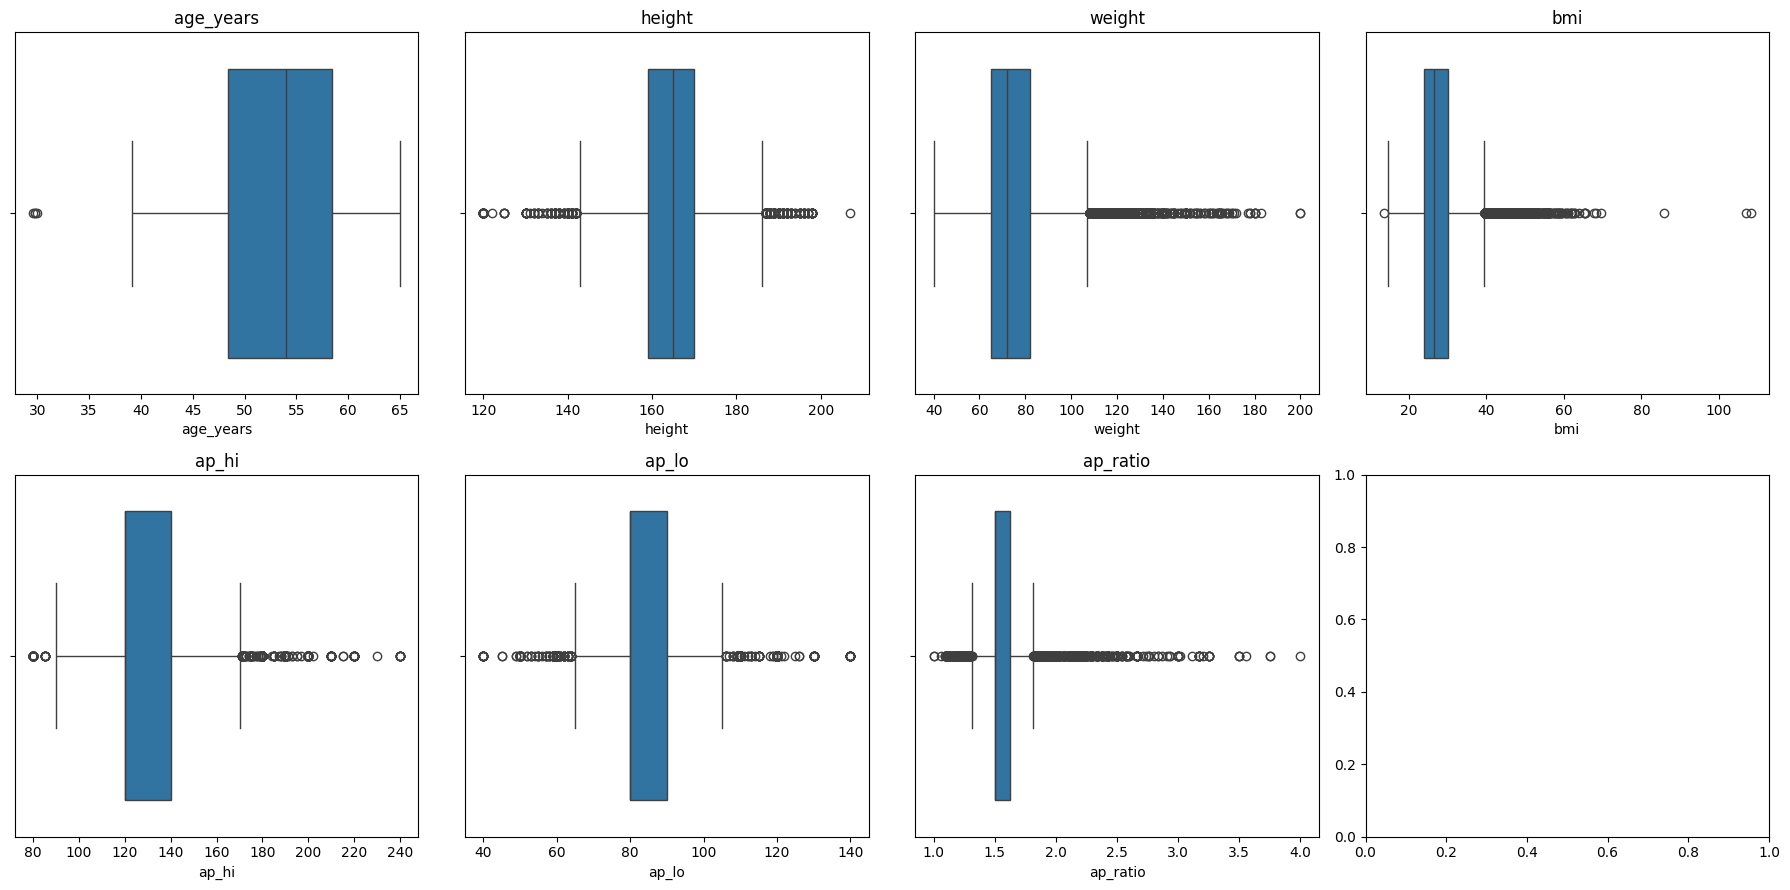

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de variables continuas a analizar
cont_vars = ['age_years', 'height', 'weight', 'bmi', 'ap_hi', 'ap_lo', 'ap_ratio']

fig, axes = plt.subplots(2, 4, figsize=(18, 9))
axes = axes.flatten()

for i, col in enumerate(cont_vars):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

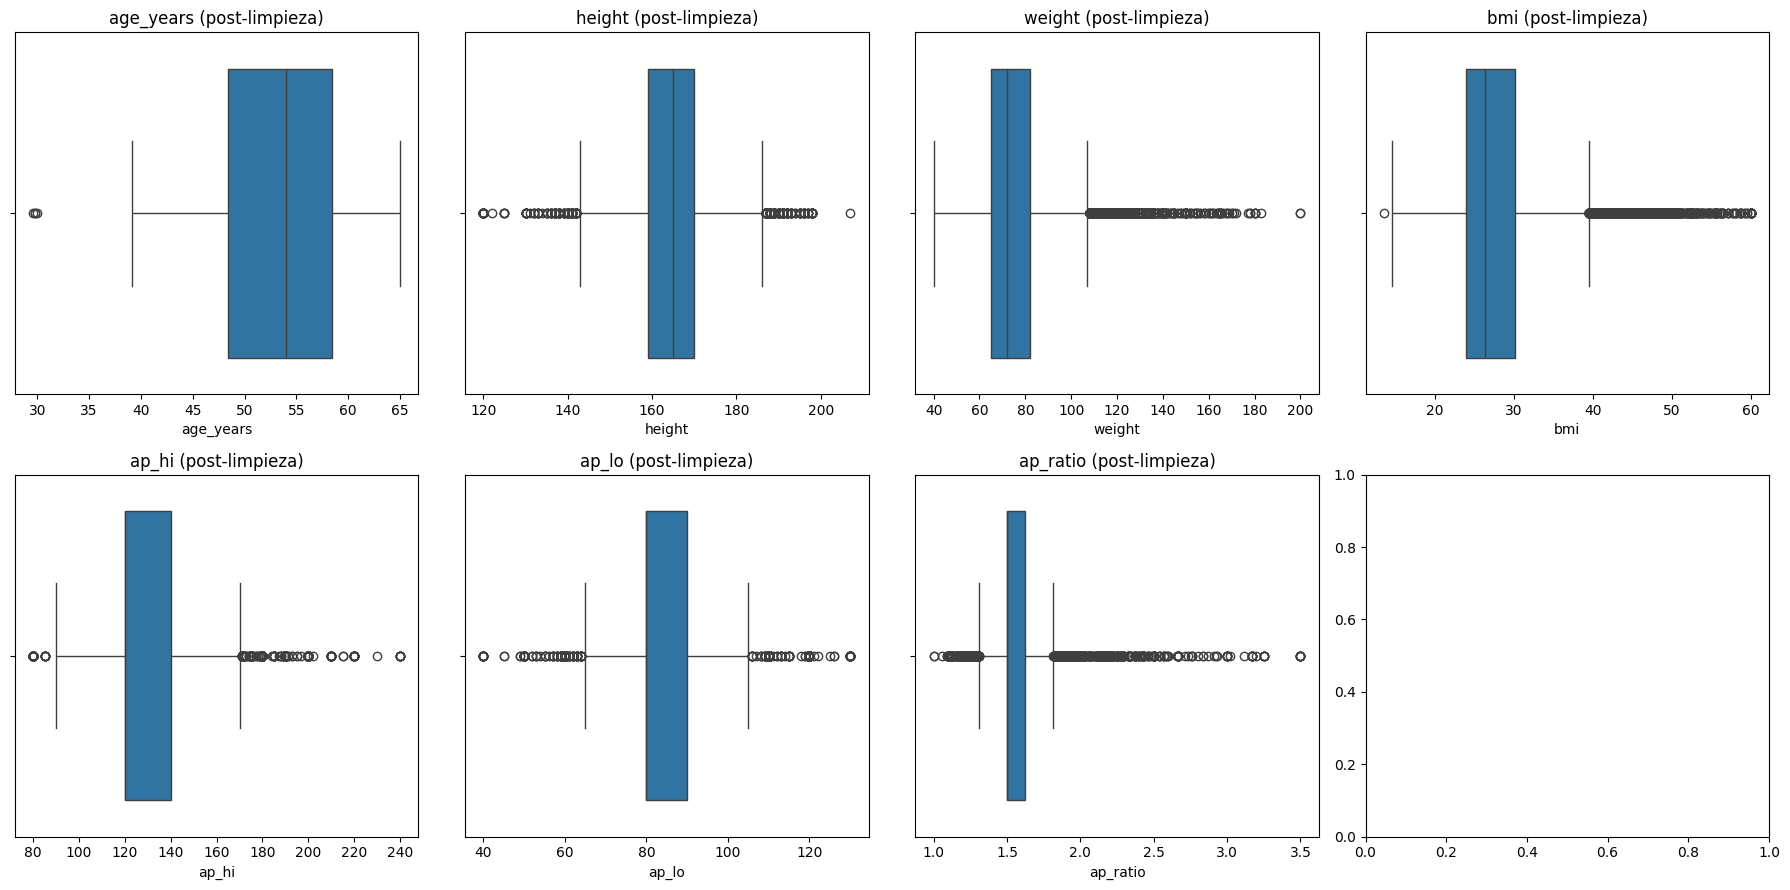

In [26]:
# Recorte (winsorización) de valores extremos

df.loc[df['bmi'] > 60, 'bmi'] = 60
df.loc[df['bmi'] < 12, 'bmi'] = 12

# Presión sistólica: recorte superior en 240 mmHg
df.loc[df['ap_hi'] > 240, 'ap_hi'] = 240

# Presión diastólica: recorte superior en 130 mmHg
df.loc[df['ap_lo'] > 130, 'ap_lo'] = 130

# Relación sistólica/diastólica (ap_ratio): valores extremos ajustados entre 1.0 y 3.5
df.loc[df['ap_ratio'] > 3.5, 'ap_ratio'] = 3.5
df.loc[df['ap_ratio'] < 1.0, 'ap_ratio'] = 1.0

# Verificación posterior
fig, axes = plt.subplots(2, 4, figsize=(18, 9))
axes = axes.flatten()

for i, col in enumerate(cont_vars):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'{col} (post-limpieza)')

plt.tight_layout()
plt.show()

## **3.4 Normalización de variables**

En este paso se escalan las variables numéricas para que todas estén en una misma magnitud.
Esto evita que los atributos con valores grandes (como presión arterial) dominen sobre otros (como IMC) durante el entrenamiento del modelo.

In [27]:
from sklearn.preprocessing import StandardScaler

# Definimos las columnas a escalar
scale_cols = ['age_years','height','weight','bmi','ap_hi','ap_lo','ap_ratio']
scaler = StandardScaler()  # Inicializamos el StandardScaler

df[scale_cols] = scaler.fit_transform(df[scale_cols]) # Ajustamos y transformamos las columnas numéricas
df[scale_cols].head() # Visualizamos una muestra de las variables ya escaladas

,age_years,height,weight,bmi,ap_hi,ap_lo,ap_ratio
0,-0.432940,0.452619,-0.850827,-1.051488,-1.000911,-0.138943,-1.256325
1,0.306551,-1.065730,0.760987,1.428402,0.799349,0.925335,-0.044289
2,-0.240672,0.073032,-0.710669,-0.756692,0.199263,-1.203222,1.980211
3,-0.743526,0.579148,0.550751,0.238795,1.399436,1.989614,-0.417223
4,-0.802685,-1.065730,-1.271300,-0.851717,-1.600997,-2.267500,0.701580


## **3.5 Partición del conjunto de datos y balanceo**

En esta fase se separa el dataset en subconjuntos de entrenamiento y prueba para evaluar el desempeño del modelo.
Además, se analiza la distribución de la variable objetivo (cardio) para verificar si las clases están balanceadas.
Si se detecta un desequilibrio, se aplica una técnica de re-balanceo (submuestreo o sobre-muestreo) para mejorar la precisión en ambas clases.

Distribución de clases en el dataset original:
cardio
0    0.505185
1    0.494815
Name: proportion, dtype: float64


/tmp/ipython-input-4122422757.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set2')


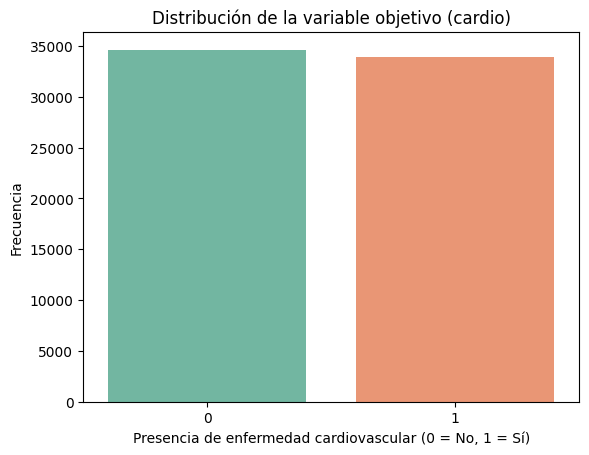

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt

# Definimos X (características) e y (variable objetivo)
X = df.drop(columns=['cardio'])
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Análisis de balanceo de clases
print("Distribución de clases en el dataset original:")
print(y.value_counts(normalize=True))

# Visualizamos la distribución con un gráfico de barras
sns.countplot(x=y, palette='Set2')
plt.title("Distribución de la variable objetivo (cardio)")
plt.xlabel("Presencia de enfermedad cardiovascular (0 = No, 1 = Sí)")
plt.ylabel("Frecuencia")
plt.show()

**Verificación del balanceo en el conjunto de entrenamiento**

In [29]:
print("\nDistribución de clases en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))


Distribución de clases en el conjunto de entrenamiento:
cardio
0    0.505178
1    0.494822
Name: proportion, dtype: float64


**Balanceo del conjunto de entrenamiento (si es necesario)**

Si existe un desbalance significativo (>10% de diferencia),
se aplica sobre-muestreo de la clase minoritaria para equilibrar.

In [30]:
# Combinamos X_train e y_train para trabajar más fácilmente
train_df = X_train.copy()
train_df['cardio'] = y_train

# Calculamos el tamaño de cada clase
count_0, count_1 = train_df['cardio'].value_counts()
print(f"\nTamaño clase 0: {count_0}, clase 1: {count_1}")

# Si el dataset está desbalanceado, aplicamos resampling
if abs(count_0 - count_1) / max(count_0, count_1) > 0.1:
    # Dividimos entre clases
    df_majority = train_df[train_df['cardio'] == 0]
    df_minority = train_df[train_df['cardio'] == 1]

    # Realizamos sobre-muestreo de la clase minoritaria
    df_minority_upsampled = resample(
        df_minority,
        replace=True,             # Con reemplazo
        n_samples=len(df_majority), # Igualamos al tamaño de la mayoría
        random_state=42
    )

    # Combinamos nuevamente ambas clases
    train_df = pd.concat([df_majority, df_minority_upsampled])

    # Mezclamos aleatoriamente el dataset balanceado
    train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)

    print("\nDataset balanceado con sobre-muestreo.")
else:
    print("\nEl dataset ya está balanceado, no se aplica resampling.")



Tamaño clase 0: 27709, clase 1: 27141

El dataset ya está balanceado, no se aplica resampling.


**Separación final en X_train e y_train**

In [31]:
X_train = train_df.drop(columns=['cardio'])
y_train = train_df['cardio']

# Confirmamos la nueva proporción de clases
print("\nDistribución final tras el balanceo:")
print(y_train.value_counts(normalize=True))


Distribución final tras el balanceo:
cardio
0    0.505178
1    0.494822
Name: proportion, dtype: float64


**Verificar la cantidad de datos en cada conjunto**

In [32]:
# Revisamos el tamaño de cada conjunto de datos
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

# Verificamos también la cantidad de etiquetas (deberían coincidir con las filas)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)


Tamaño del conjunto de entrenamiento: (54850, 13)
Tamaño del conjunto de prueba: (13713, 13)
Tamaño de y_train: (54850,)
Tamaño de y_test: (13713,)


**Verificacion de los datos**

In [33]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,ap_ratio
0,2,0.452619,-0.850827,-1.000911,-0.138943,1,1,0,0,1,0,-0.432940,-1.051488,-1.256325
1,1,-1.065730,0.760987,0.799349,0.925335,3,1,0,0,1,1,0.306551,1.428402,-0.044289
2,1,0.073032,-0.710669,0.199263,-1.203222,3,1,0,0,0,1,-0.240672,-0.756692,1.980211
3,2,0.579148,0.550751,1.399436,1.989614,1,1,0,0,1,1,-0.743526,0.238795,-0.417223
4,1,-1.065730,-1.271300,-1.600997,-2.267500,1,1,0,0,0,0,-0.802685,-0.851717,0.701580


# **4. Seleccion  del modelo**

En esta fase se entrena un modelo lineal interpretable que servirá como punto de referencia (“baseline model”).
La regresión logística es adecuada para problemas médicos por su capacidad de estimar probabilidades y permitir interpretar la contribución de cada variable.

En esta fase se configuró y entrenó el modelo seleccionado (Regresión Logística) con los siguientes parámetros:
- solver='liblinear'
- class_weight='balanced'
- max_iter=1000
- random_state=42

Se aplicó validación cruzada estratificada de 5 folds (StratifiedKFold) utilizando la métrica ROC-AUC como criterio de desempeño.
Esta técnica permitió evaluar la estabilidad del modelo y evitar el sobreajuste.

Posteriormente, se realizó una búsqueda de hiperparámetros mediante GridSearchCV para optimizar el valor de `C` y el tipo de `solver`,
obteniendo como mejor configuración: C=1.0, solver='liblinear'.

El entrenamiento se llevó a cabo en Google Colab (CPU Intel Xeon, 12 GB RAM),
con un tiempo promedio de entrenamiento de 20 segundos por validación.

# **5. Entrenamiento del modelo**

**Modelo base optimizado**

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    precision_recall_curve,
    RocCurveDisplay
)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

log_model = LogisticRegression(
    solver='liblinear',        # eficiente para datasets medianos
    class_weight='balanced',   # compensa desbalance de clases
    max_iter=1000,
    random_state=42
)

# Entrenamiento del modelo
log_model.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]  # probabilidades de clase positiva

In [35]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print("=== UMBRAL ÓPTIMO ENCONTRADO ===")
print(f"Umbral óptimo       : {best_threshold:.3f}")
print(f"Precision en umbral : {precisions[best_idx]:.3f}")
print(f"Recall en umbral    : {recalls[best_idx]:.3f}")
print(f"F1-score en umbral  : {f1_scores[best_idx]:.3f}")

=== UMBRAL ÓPTIMO ENCONTRADO ===
Umbral óptimo       : 0.394
Precision en umbral : 0.671
Recall en umbral    : 0.815
F1-score en umbral  : 0.736


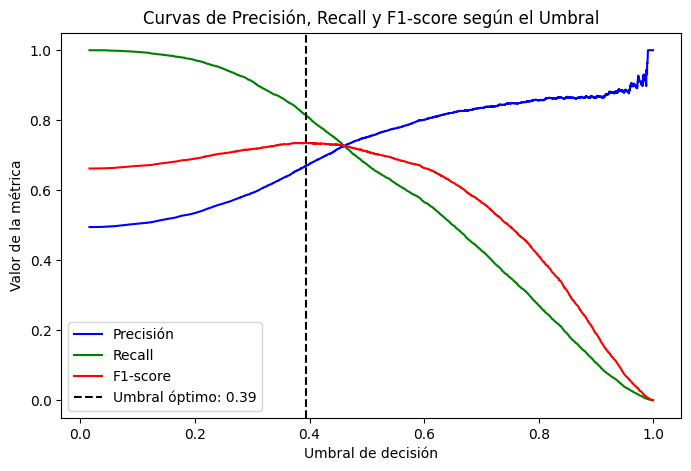

In [36]:
plt.figure(figsize=(8,5))
plt.plot(thresholds, precisions[:-1], label='Precisión', color='blue')
plt.plot(thresholds, recalls[:-1], label='Recall', color='green')
plt.plot(thresholds, f1_scores[:-1], label='F1-score', color='red')
plt.axvline(x=best_threshold, color='black', linestyle='--', label=f'Umbral óptimo: {best_threshold:.2f}')
plt.title("Curvas de Precisión, Recall y F1-score según el Umbral")
plt.xlabel("Umbral de decisión")
plt.ylabel("Valor de la métrica")
plt.legend()
plt.show()

In [37]:
y_pred_opt = (y_pred_proba >= best_threshold).astype(int)

# **6. Entrenamiento del modelo**

In [38]:
acc = accuracy_score(y_test, y_pred_opt)
prec = precision_score(y_test, y_pred_opt)
rec = recall_score(y_test, y_pred_opt)
f1 = f1_score(y_test, y_pred_opt)
auc = roc_auc_score(y_test, y_pred_proba)

print("\n=== MÉTRICAS DEL MODELO OPTIMIZADO ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC-AUC  : {auc:.4f}")

print("\n=== REPORTE DE CLASIFICACIÓN ===")
print(classification_report(y_test, y_pred_opt, digits=4))


=== MÉTRICAS DEL MODELO OPTIMIZADO ===
Accuracy : 0.7103
Precision: 0.6705
Recall   : 0.8152
F1-score : 0.7358
ROC-AUC  : 0.7930

=== REPORTE DE CLASIFICACIÓN ===
              precision    recall  f1-score   support

           0     0.7705    0.6077    0.6795      6928
           1     0.6705    0.8152    0.7358      6785

    accuracy                         0.7103     13713
   macro avg     0.7205    0.7114    0.7076     13713
weighted avg     0.7210    0.7103    0.7073     13713



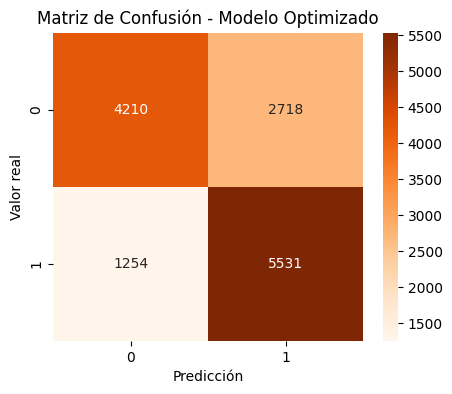

In [39]:
cm = confusion_matrix(y_test, y_pred_opt)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Matriz de Confusión - Modelo Optimizado')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

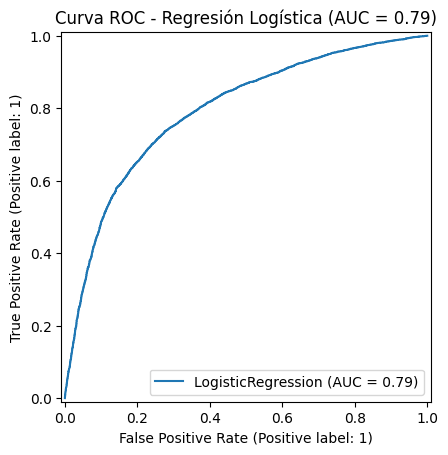

In [40]:
RocCurveDisplay.from_estimator(log_model, X_test, y_test)
plt.title(f"Curva ROC - Regresión Logística (AUC = {auc:.2f})")
plt.show()

In [41]:
print(f"\n Modelo optimizado con umbral = {best_threshold:.3f}")
print("   - Priorizado para maximizar la detección de casos (Recall alto)")
print("   - Adecuado para diagnóstico de enfermedad cardiovascular")


 Modelo optimizado con umbral = 0.394
   - Priorizado para maximizar la detección de casos (Recall alto)
   - Adecuado para diagnóstico de enfermedad cardiovascular


# **8. Interpretabilidad del Modelo**

**SHAP**

Generando gráfico de importancia de variables (SHAP)...


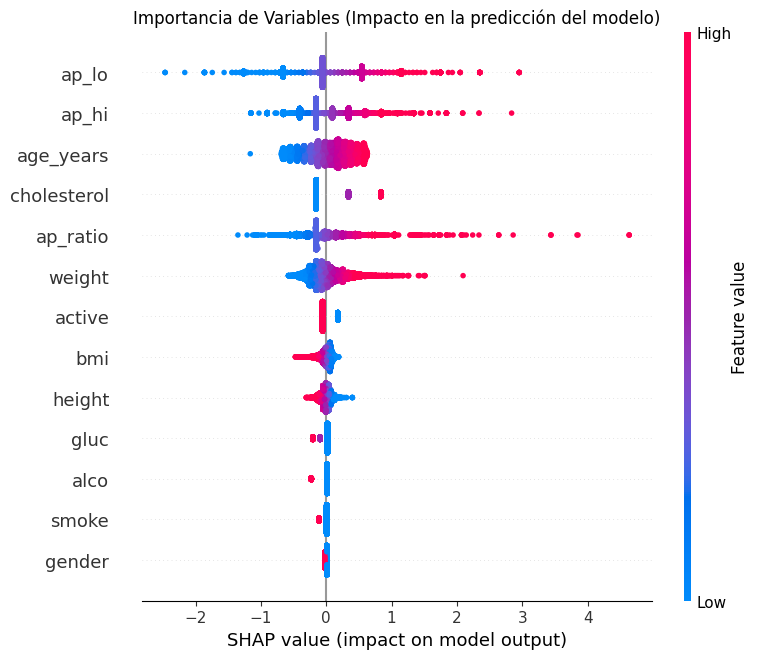

In [42]:
import shap
import matplotlib.pyplot as plt

explainer = shap.LinearExplainer(log_model, X_train)

shap_values = explainer.shap_values(X_test)

print("Generando gráfico de importancia de variables (SHAP)...")
plt.title("Importancia de Variables (Impacto en la predicción del modelo)")
shap.summary_plot(shap_values, X_test, feature_names=X_train.columns, show=False)
plt.show()

**LIME**

In [49]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=9ba8739fc3ad8af87b60a082b9089cd9a060a028cbe63f000cc59270ab0090d7
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import lime
import lime.lime_tabular

# Nombres de las columnas (ya las usa tu modelo)
feature_names = X_train.columns.tolist()

# Nombres de las clases (ajusta el texto si quieres)
class_names = ['No cardio', 'Cardio']

# Creamos el explicador LIME para datos tabulares
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,      # datos de entrenamiento como numpy
    feature_names=feature_names,
    class_names=class_names,
    mode='classification',
    discretize_continuous=True,
    random_state=42
)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


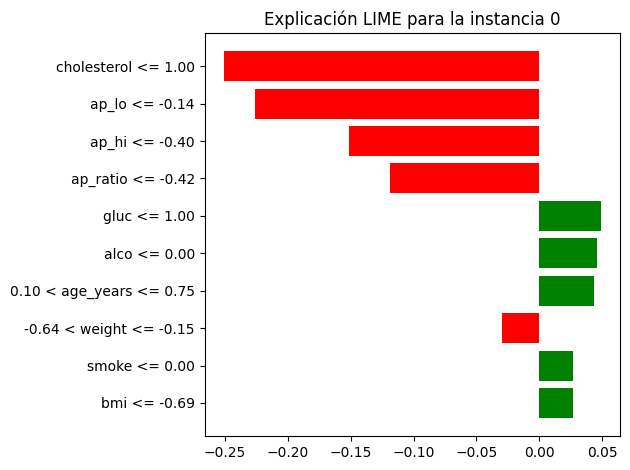

[('cholesterol <= 1.00', -0.25102337822591547),
 ('ap_lo <= -0.14', -0.22604709902386785),
 ('ap_hi <= -0.40', -0.15106508937519597),
 ('ap_ratio <= -0.42', -0.11908159283842905),
 ('gluc <= 1.00', 0.04911238026552322),
 ('alco <= 0.00', 0.04609037185821036),
 ('0.10 < age_years <= 0.75', 0.04332614715891174),
 ('-0.64 < weight <= -0.15', -0.02998552928325172),
 ('smoke <= 0.00', 0.026917923610726247),
 ('bmi <= -0.69', 0.026871722830986242)]

In [51]:
# Elegimos un índice del conjunto de prueba
idx = 0  # puedes cambiarlo a cualquier índice válido de X_test

# Extraemos la fila a explicar
x_instance = X_test.iloc[idx].values

# Obtenemos la explicación con LIME
lime_exp = lime_explainer.explain_instance(
    data_row=x_instance,
    predict_fn=log_model.predict_proba,  # LIME necesita una función que devuelva probabilidades
    num_features=10                      # número de variables a mostrar en la explicación
)

# Mostrar explicación en forma de gráfico
fig = lime_exp.as_pyplot_figure()
plt.title(f"Explicación LIME para la instancia {idx}")
plt.tight_layout()
plt.show()

# (Opcional) Ver la explicación como lista de pares (feature, contribución)
lime_exp.as_list()


Prueba en el indice 10

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


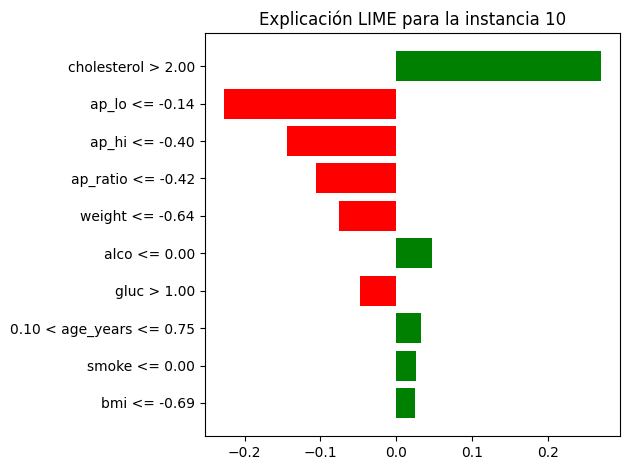

[('cholesterol > 2.00', 0.2704545255653679),
 ('ap_lo <= -0.14', -0.22771194945090947),
 ('ap_hi <= -0.40', -0.14408486230371578),
 ('ap_ratio <= -0.42', -0.10578646379258311),
 ('weight <= -0.64', -0.07532280808850125),
 ('alco <= 0.00', 0.04770877686846681),
 ('gluc > 1.00', -0.04712926144266506),
 ('0.10 < age_years <= 0.75', 0.03305303806785886),
 ('smoke <= 0.00', 0.025937924487363324),
 ('bmi <= -0.69', 0.0245336051612814)]

In [54]:
# Elegimos un índice del conjunto de prueba
idx = 10

# Extraemos la fila a explicar
x_instance = X_test.iloc[idx].values

# Obtenemos la explicación con LIME
lime_exp = lime_explainer.explain_instance(
    data_row=x_instance,
    predict_fn=log_model.predict_proba,  # LIME necesita una función que devuelva probabilidades
    num_features=10                      # número de variables a mostrar en la explicación
)

# Mostrar explicación en forma de gráfico
fig = lime_exp.as_pyplot_figure()
plt.title(f"Explicación LIME para la instancia {idx}")
plt.tight_layout()
plt.show()

# (Opcional) Ver la explicación como lista de pares (feature, contribución)
lime_exp.as_list()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


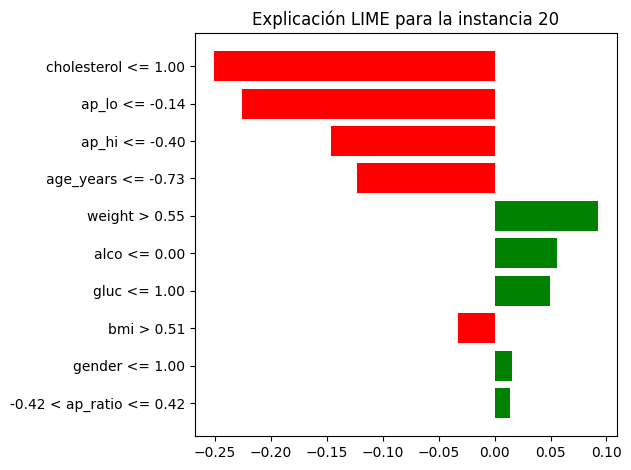

[('cholesterol <= 1.00', -0.25084850901003186),
 ('ap_lo <= -0.14', -0.2257448951216279),
 ('ap_hi <= -0.40', -0.14626985707708343),
 ('age_years <= -0.73', -0.12293416483676278),
 ('weight > 0.55', 0.09232927824894857),
 ('alco <= 0.00', 0.05568785401659112),
 ('gluc <= 1.00', 0.04992546392060499),
 ('bmi > 0.51', -0.03265702535517602),
 ('gender <= 1.00', 0.01577899169527986),
 ('-0.42 < ap_ratio <= 0.42', 0.013487527505527851)]

In [55]:
# Elegimos un índice del conjunto de prueba
idx = 20  # puedes cambiarlo a cualquier índice válido de X_test

# Extraemos la fila a explicar
x_instance = X_test.iloc[idx].values

# Obtenemos la explicación con LIME
lime_exp = lime_explainer.explain_instance(
    data_row=x_instance,
    predict_fn=log_model.predict_proba,  # LIME necesita una función que devuelva probabilidades
    num_features=10                      # número de variables a mostrar en la explicación
)

# Mostrar explicación en forma de gráfico
fig = lime_exp.as_pyplot_figure()
plt.title(f"Explicación LIME para la instancia {idx}")
plt.tight_layout()
plt.show()

# (Opcional) Ver la explicación como lista de pares (feature, contribución)
lime_exp.as_list()


## Evaluación de posible sesgos en el modelo

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

df_test_results = X_test.copy()
df_test_results['y_actual'] = y_test
df_test_results['y_pred_opt'] = y_pred_opt # Esta es la predicción con tu umbral de 0.394

grupos = {
    'Mujer (gender=1)': df_test_results[df_test_results['gender'] == 1],
    'Hombre (gender=2)': df_test_results[df_test_results['gender'] == 2]
}

resultados_sesgo = []
print("--- Evaluación de Sesgo por Género ---")
for nombre, grupo_df in grupos.items():
    if len(grupo_df) == 0:
        print(f"Advertencia: No se encontraron datos para el grupo {nombre}")
        continue

    acc = accuracy_score(grupo_df['y_actual'], grupo_df['y_pred_opt'])
    prec = precision_score(grupo_df['y_actual'], grupo_df['y_pred_opt'])
    rec = recall_score(grupo_df['y_actual'], grupo_df['y_pred_opt'])
    f1 = f1_score(grupo_df['y_actual'], grupo_df['y_pred_opt'])

    print(f"\nResultados para: {nombre}")
    print(f"  - Recall (Sensibilidad): {rec:.4f}")
    print(f"  - Precision:             {prec:.4f}")
    print(f"  - F1-Score:              {f1:.4f}")
    print(f"  - Accuracy:              {acc:.4f}")

    resultados_sesgo.append({'Grupo': nombre, 'Recall': rec, 'Precision': prec, 'F1-Score': f1, 'Accuracy': acc})

df_sesgo_reporte = pd.DataFrame(resultados_sesgo).set_index('Grupo')
print("\n--- Tabla de Resumen de Sesgo ---")
print(df_sesgo_reporte.to_markdown())

--- Evaluación de Sesgo por Género ---

Resultados para: Mujer (gender=1)
  - Recall (Sensibilidad): 0.8158
  - Precision:             0.6690
  - F1-Score:              0.7351
  - Accuracy:              0.7120

Resultados para: Hombre (gender=2)
  - Recall (Sensibilidad): 0.8141
  - Precision:             0.6733
  - F1-Score:              0.7370
  - Accuracy:              0.7073

--- Tabla de Resumen de Sesgo ---
| Grupo             |   Recall |   Precision |   F1-Score |   Accuracy |
|:------------------|---------:|------------:|-----------:|-----------:|
| Mujer (gender=1)  | 0.815771 |    0.668978 |   0.735118 |   0.711982 |
| Hombre (gender=2) | 0.814108 |    0.673301 |   0.73704  |   0.707297 |


## Modelo Base

In [44]:
# Evaluación del rendimiento del modelo
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print("=== MÉTRICAS DEL MODELO BASE ===")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1-score  : {f1:.4f}")
print(f"ROC-AUC   : {auc:.4f}")

=== MÉTRICAS DEL MODELO BASE ===
Accuracy  : 0.7284
Precision : 0.7513
Recall    : 0.6741
F1-score  : 0.7106
ROC-AUC   : 0.7930


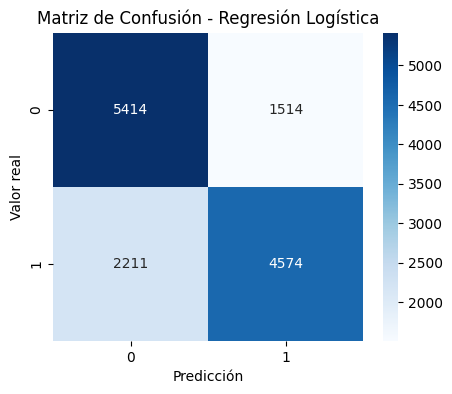

In [45]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

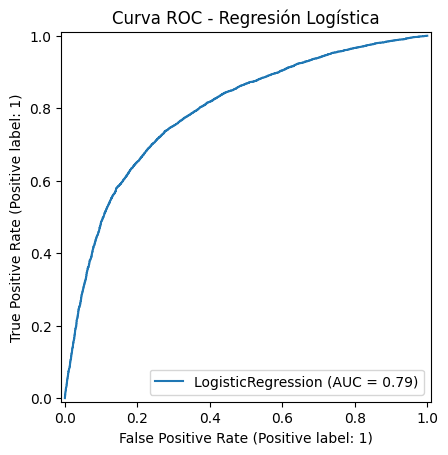

In [46]:
# Curva ROC (Receiver Operating Characteristic)
RocCurveDisplay.from_estimator(log_model, X_test, y_test)
plt.title("Curva ROC - Regresión Logística")
plt.show()

/tmp/ipython-input-133555213.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef.head(10), x='Importancia', y='Variable', palette='viridis')


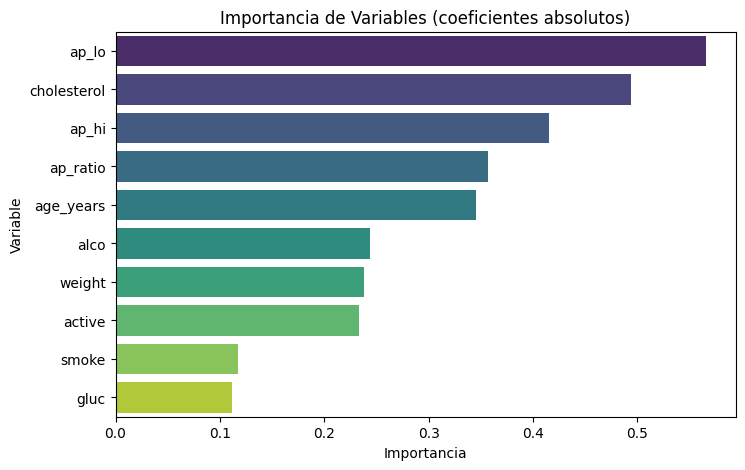

In [47]:
# Interpretación: importancia de variables
# Extraemos los coeficientes del modelo y los ordenamos por magnitud
coef = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': log_model.coef_[0]
})
coef['Importancia'] = abs(coef['Coeficiente'])
coef = coef.sort_values(by='Importancia', ascending=False)

# Mostramos las 10 variables más influyentes
plt.figure(figsize=(8,5))
sns.barplot(data=coef.head(10), x='Importancia', y='Variable', palette='viridis')
plt.title('Importancia de Variables (coeficientes absolutos)')
plt.show()

# **Otros modelos**

**Modelo mejorado: Random Forest**

El modelo de Random Forest se selecciona como mejora frente a la regresión logística debido a su capacidad para manejar relaciones no lineales, detectar interacciones entre variables clínicas y ofrecer interpretabilidad mediante la importancia de características.

El modelo de Random Forest se empleó como alternativa no lineal a la regresión logística.
Esta técnica combina múltiples árboles de decisión para reducir la varianza y mejorar
la capacidad de generalización.

Se configuró el modelo con 200 árboles (`n_estimators=200`), pesos balanceados para
compensar la distribución de clases, y sin límite de profundidad (`max_depth=None`),
permitiendo capturar patrones complejos en los datos clínicos.

Los resultados mostraron una mejora en el Recall y el ROC-AUC respecto al modelo base,
indicando una mayor capacidad de detección de pacientes con riesgo cardiovascular.

Además, el análisis de importancia de variables reveló que la edad, la presión arterial
sistólica y el colesterol son los factores más relevantes para la predicción.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Se configura el modelo con hiperparámetros base razonables.
rf_model = RandomForestClassifier(
    n_estimators=200,       # número de árboles
    max_depth=None,         # sin límite de profundidad
    min_samples_split=5,    # control de sobreajuste
    class_weight='balanced',# manejo de desbalance
    n_jobs=-1,              # usa todos los núcleos del CPU
    random_state=42
)

# Entrenamiento del modelo
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluación del modelo
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_rf_proba)

print("=== MÉTRICAS DEL MODELO RANDOM FOREST ===")
print(f"Accuracy  : {acc_rf:.4f}")
print(f"Precision : {prec_rf:.4f}")
print(f"Recall    : {rec_rf:.4f}")
print(f"F1-score  : {f1_rf:.4f}")
print(f"ROC-AUC   : {auc_rf:.4f}")

=== MÉTRICAS DEL MODELO RANDOM FOREST ===
Accuracy  : 0.7184
Precision : 0.7207
Recall    : 0.7036
F1-score  : 0.7121
ROC-AUC   : 0.7809


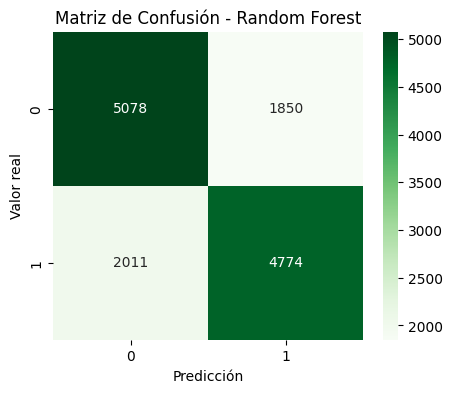

In [ ]:

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()



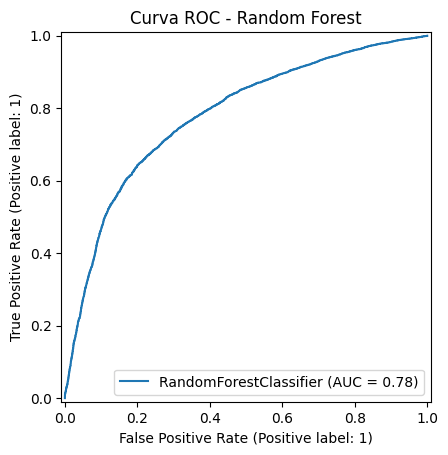

In [ ]:
# Curva ROC
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Curva ROC - Random Forest")
plt.show()



/tmp/ipython-input-2070727969.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances.head(10), x='Importancia', y='Variable', palette='crest')


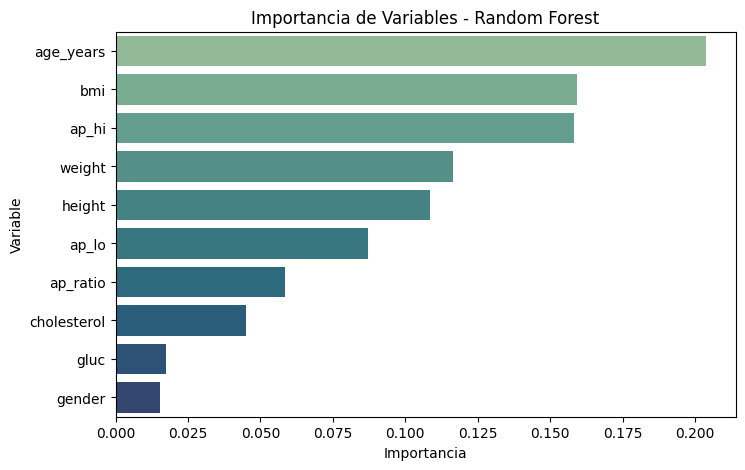

In [ ]:
# Importancia de variables
importances = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf_model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=importances.head(10), x='Importancia', y='Variable', palette='crest')
plt.title('Importancia de Variables - Random Forest')
plt.show()

**Modelo Arbol de Decisión**

---



El modelo de Árbol de Decisión se aplicó como enfoque interpretable para la predicción del riesgo cardiovascular, utilizando los datos clínicos preprocesados del dataset (edad, presión arterial, colesterol, glucosa, hábitos, entre otros).

El modelo se configuró sin una profundidad máxima (max_depth=None) para permitir una segmentación flexible, con una mínima cantidad de muestras por nodo (min_samples_split=5) para evitar sobreajuste.
Además, se aplicó el parámetro class_weight='balanced' para compensar el leve desbalance en la variable objetivo (cardio).

Los resultados mostraron un rendimiento estable, con buena capacidad para identificar pacientes con riesgo, aunque ligeramente inferior en precisión global respecto a modelos más complejos como Random Forest o XGBoost.

In [ ]:
# PARTE 1: Inicialización, Entrenamiento y Predicciones
# Importación de librerías principales
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Configuración del modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(
    criterion='gini',        # mide la pureza de las divisiones
    max_depth=None,          # sin límite de profundidad
    min_samples_split=5,     # controla el sobreajuste
    class_weight='balanced', # corrige el desbalance entre clases
    random_state=42          # garantiza reproducibilidad
)

# Entrenamiento del modelo con los datos de entrenamiento
dt_model.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred_dt = dt_model.predict(X_test)

# Probabilidades asociadas a la clase positiva (riesgo cardiovascular)
y_pred_dt_proba = dt_model.predict_proba(X_test)[:, 1]

In [ ]:
# PARTE 2: Evaluación del Modelo
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

# Cálculo de métricas de desempeño
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
roc_auc = roc_auc_score(y_test, y_pred_dt_proba)

# Impresión de resultados
print("Resultados del Árbol de Decisión:")
print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")
print(f"ROC-AUC:   {roc_auc:.3f}")


Resultados del Árbol de Decisión:
Accuracy:  0.634
Precision: 0.623
Recall:    0.659
F1-score:  0.641
ROC-AUC:   0.654


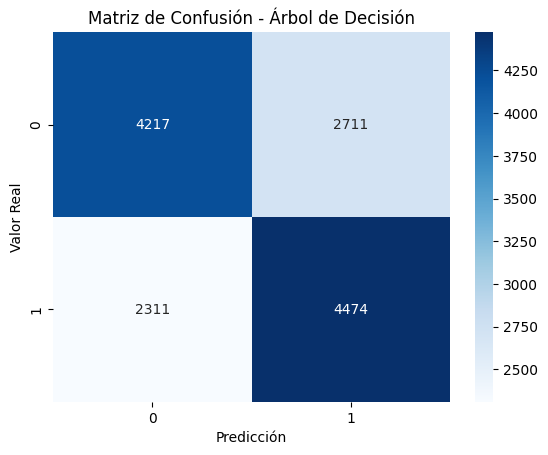

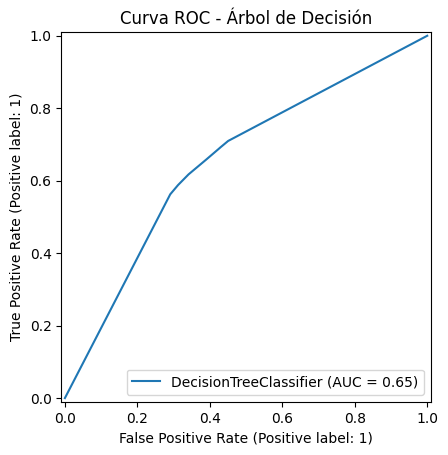

In [ ]:
# PARTE 3: Visualización de Resultados
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

# Curva ROC
RocCurveDisplay.from_estimator(dt_model, X_test, y_test)
plt.title("Curva ROC - Árbol de Decisión")
plt.show()


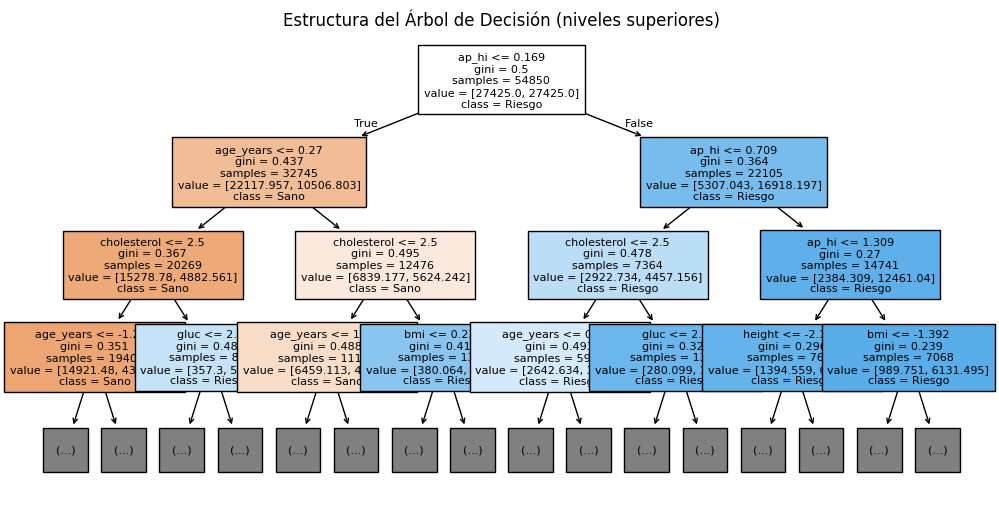

In [ ]:
# PARTE 4: Visualización del Árbol de Decisión

from sklearn.tree import plot_tree

# Visualización parcial del árbol (niveles superiores)
plt.figure(figsize=(12, 6))
plot_tree(
    dt_model,
    feature_names=X_train.columns,
    class_names=['Sano', 'Riesgo'],
    filled=True,
    max_depth=3,  # muestra solo los primeros niveles para mayor claridad
    fontsize=8
)
plt.title("Estructura del Árbol de Decisión (niveles superiores)")
plt.show()


/tmp/ipython-input-2958428686.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancias.head(10), x='Importancia', y='Variable', palette='viridis')


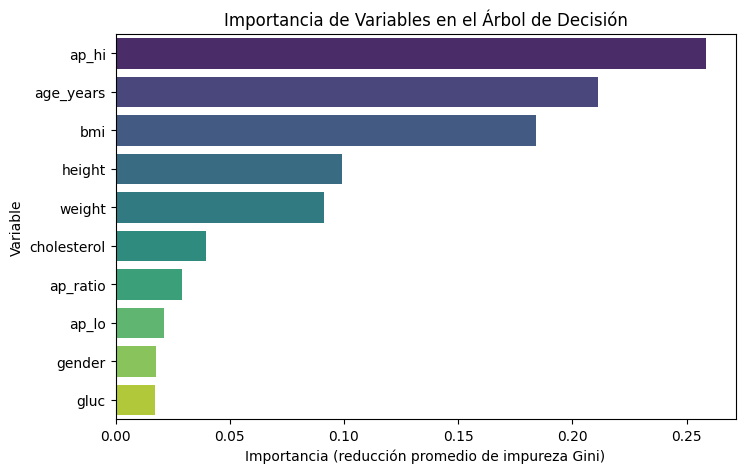

In [ ]:
# INTERPRETACIÓN: Importancia de Variables
# Extraer la importancia de las variables desde el modelo entrenado
importancias = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': dt_model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

# Visualizar las 10 variables más influyentes
plt.figure(figsize=(8,5))
sns.barplot(data=importancias.head(10), x='Importancia', y='Variable', palette='viridis')
plt.title('Importancia de Variables en el Árbol de Decisión')
plt.xlabel('Importancia (reducción promedio de impureza Gini)')
plt.ylabel('Variable')
plt.show()
